In [3]:
#Importing required libraries
import pandas as pd
import numpy as np

### Reading the Dataset

In [5]:
heart_df = pd.read_csv("/Users/sukanyak/Desktop/SAheart.data.csv")

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [7]:
heart_df.head(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


### Setting the dependent variable (Y) and the independent variables (X)

In [8]:
X = heart_df[['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']]
Y = heart_df['chd']

In [9]:
X[0:5]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49


In [10]:
Y[0:5]

0    1
1    1
2    0
3    1
4    1
Name: chd, dtype: int64

### Encoding the categorical variable 'famhist'. All other variables are already in the correct format

In [11]:
# Creating a dummy variable for famhist and then concatenating it in the original dataframe.
dummy = pd.get_dummies(X['famhist'])
dummy.head(5)

,Absent,Present
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [12]:
X = pd.concat([X,dummy], axis=1)

In [13]:
X.drop('famhist', axis = 1, inplace=True)
X.head(10)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,Absent,Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,0,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,0,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,0,1
5,132,6.20,6.47,36.21,62,30.77,14.14,45,0,1
6,142,4.05,3.38,16.20,59,20.81,2.62,38,1,0
7,114,4.08,4.59,14.60,62,23.11,6.72,58,0,1
8,114,0.00,3.83,19.40,49,24.86,2.49,29,0,1
9,132,0.00,5.80,30.96,69,30.11,0.00,53,0,1


### Normalizing the numerical features

In [14]:
Y = np.array((Y - Y.min())/ (Y.max()- Y.min()))

In [15]:
Y[0:10]

array([1., 1., 0., 1., 1., 0., 0., 1., 0., 1.])

In [16]:
X = X.apply( lambda rec: ( rec - rec.min() ) / ( rec.max() - rec.min() ), axis = 0 )

In [17]:
X = np.array(X)
X[0:10]

array([[5.04273504e-01, 3.84615385e-01, 3.31010453e-01, 4.57902098e-01,
        5.53846154e-01, 3.32496863e-01, 6.60370949e-01, 7.55102041e-01,
        0.00000000e+00, 1.00000000e+00],
       [3.67521368e-01, 3.20512821e-04, 2.39024390e-01, 6.11748252e-01,
        6.46153846e-01, 4.44479297e-01, 1.39955160e-02, 9.79591837e-01,
        1.00000000e+00, 0.00000000e+00],
       [1.45299145e-01, 2.56410256e-03, 1.74216028e-01, 7.14405594e-01,
        6.00000000e-01, 4.52948557e-01, 2.58849107e-02, 6.32653061e-01,
        0.00000000e+00, 1.00000000e+00],
       [5.89743590e-01, 2.40384615e-01, 3.78397213e-01, 8.75244755e-01,
        5.84615385e-01, 5.42346299e-01, 1.64820980e-01, 8.77551020e-01,
        0.00000000e+00, 1.00000000e+00],
       [2.82051282e-01, 4.35897436e-01, 1.75609756e-01, 5.88531469e-01,
        7.23076923e-01, 3.54140527e-01, 3.89564508e-01, 6.93877551e-01,
        0.00000000e+00, 1.00000000e+00],
       [2.64957265e-01, 1.98717949e-01, 3.82578397e-01, 8.24335664e-01,
   

### Randomly initialise beta values

In [18]:
import random

In [19]:
def beta_init(dim):
    bi = np.random.rand(dim)
    
    return bi

In [20]:
#11 beta coefficients : one intercept and 10 features
bi = beta_init(11)
print(bi)

[0.05936437 0.12010759 0.59173    0.60312643 0.78761314 0.5215135
 0.79133262 0.05860856 0.0014692  0.12217724 0.3142823 ]


### Defining a sigmoid function to predict Y values

In [21]:
def cal_sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Defining a function to calculate the binary cross entropy

In [22]:
#defining the log likelihood function
def log_likelihood(X,Y,bi):
    z = np.dot(X, bi)
    h = cal_sigmoid(z)
    
    ll = np.sum(np.multiply(-Y, np.log(h)) + np.multiply(-(1-Y), np.log(1-h))) / len(X) 
    
    return ll

### Updating beta values and calculating gradient descent through iterations

In [23]:
def logistic_regression(X, Y,bi, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    
    for step in range(num_steps):
        z = np.dot(X, bi)
        pred_Y = cal_sigmoid(z)

        # Update beta values (bi) with gradient
        output_error_signal = Y - pred_Y
        gradient = np.dot(X.T, output_error_signal)
        bi += learning_rate * gradient
        
        # Print log-likelihood
        if step % 10000 == 0:
            print('Cost function at every 10,000 :', log_likelihood(X,Y,bi))
        
    return bi

In [41]:
#run the model
bi = logistic_regression(X, Y, bi, num_steps = 300000, learning_rate = 0.0001, add_intercept = True)

Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 : 0.5109740610091968
Cost function at every 10,000 :

In [42]:
print("The Beta Values are : " , bi)

The Beta Values are :  [-3.10374542  0.76097     2.47654511  2.49580794  0.66446981  2.57367662
 -2.00556663  0.01790749  2.21604213 -1.82601033 -0.90063991]


### Plot the cost function for different alpha values

In [34]:
def cost_plot(X, Y,bi, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    
    for step in range(num_steps):
        z = np.dot(X, bi)
        pred_Y = cal_sigmoid(z)

        # Update beta values (bi) with gradient
        output_error_signal = Y - pred_Y
        gradient = np.dot(X.T, output_error_signal)
        bi += learning_rate * gradient
        
        # Print log-likelihood
        cost = log_likelihood(X,Y,bi)
        
    return cost

In [35]:
# storing the final value for different alpha values in a variable and then plotting them
cost_var = [0,0,0,0]
cost_var[0] = cost_plot(X, Y, bi, num_steps = 300000, learning_rate = 0.01, add_intercept = True)
cost_var[1] = cost_plot(X, Y, bi, num_steps = 300000, learning_rate = 0.001, add_intercept = True)
cost_var[2] = cost_plot(X, Y, bi, num_steps = 300000, learning_rate = 0.0001, add_intercept = True)
cost_var[3] = cost_plot(X, Y, bi, num_steps = 300000, learning_rate = 0.00001, add_intercept = True)

In [36]:
cost_var

[0.6341109283661112,
 0.5109740610091968,
 0.5109740610091968,
 0.5109740610091968]

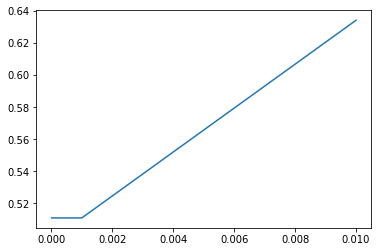

In [45]:
#Plotting the costs of different learning rates
%matplotlib inline
import matplotlib.pyplot as plt

learn_rate = [0.01,0.001,0.0001,0.00001]
plt.plot(learn_rate, cost_var, scalex =True, scaley = True)

### Implement the same using sklearn

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
skl_model = LogisticRegression(fit_intercept=True, C=1e15)
skl_model.fit(X, Y)

/Users/sukanyak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [48]:
print(skl_model.intercept_, skl_model.coef_)
print(bi)

[-2.97750423] [[ 0.76120349  2.47590956  2.49506913  0.66324897  2.57276739 -2.00422897
   0.01744179  2.21640778 -1.95143774 -1.02606649]]
[-3.10374542  0.76097     2.47654511  2.49580794  0.66446981  2.57367662
 -2.00556663  0.01790749  2.21604213 -1.82601033 -0.90063991]
